In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
colnames=['pregnant','glucose','bp','skin', 'insulin', 'bmi','pedigree','age']
for i in colnames:
    print(i,'------->',df[i].nunique())

pregnant -------> 17
glucose -------> 136
bp -------> 47
skin -------> 51
insulin -------> 186
bmi -------> 248
pedigree -------> 517
age -------> 52


In [4]:
df.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

In [5]:
df.isnull().sum() # already clean data
# as such decision trees do not need much data cleaning!

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [8]:
def plotFeatures(df,col_list,label,title):
    plt.figure(figsize=(10,14))
    i=0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(9,3,i)
        plt.plot(df[col],df[label],marker='.',linestyle='none')
        plt.title(title %(col,label))
        plt.tight_layout()

8


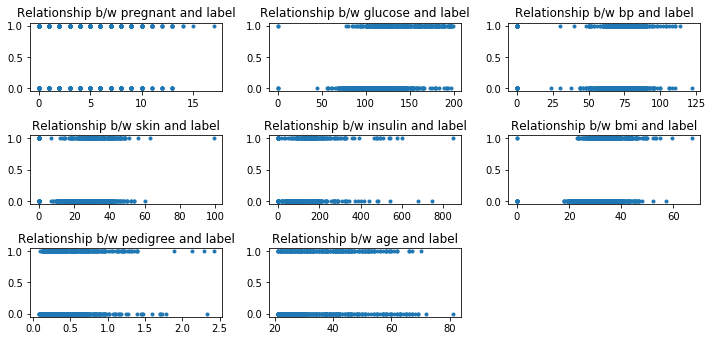

In [9]:
plotFeatures(df,colnames,'label','Relationship b/w %s and %s')

# Decision Trees 

<h3>With Default Settings</h1>

In [10]:
clf=DecisionTreeClassifier(max_depth=None)
print(clf.fit(x_train,y_train))
print(clf.score(x_val,y_val))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.7012987012987013


### With user-defined max depth  

In [11]:
clf=DecisionTreeClassifier(max_depth=3) #criterion= gini
print(clf.fit(x_train,y_train))
print(clf.score(x_val,y_val))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.7532467532467533


### Criterion used here is Entrogy instead of Gini

In [12]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
print(clf.fit(x_train,y_train))
print(clf.score(x_val,y_val))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.7532467532467533


In [13]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7272727272727273

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[97,  5],
       [37, 15]], dtype=int64)

In [15]:
clf.feature_importances_ #weights of each feature

array([0.02656059, 0.57659735, 0.        , 0.        , 0.        ,
       0.1821888 , 0.        , 0.21465327])

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. <br>
It is also known as the <b>Gini importance</b>.

In [16]:
clf.apply(x_test) # the index of the leaf that each sample is predicted as

array([ 3,  7,  3,  7, 14,  7,  3,  7,  3,  7,  7,  3,  7,  3,  6,  7,  7,
        7,  3, 13,  3, 13, 14,  3,  6,  3, 14, 13,  7,  3,  3,  6,  7,  3,
        7,  3, 13,  3,  3,  7,  7,  7,  7,  7,  7,  3,  3,  7, 13,  6,  3,
        4,  7,  3,  4,  7,  7,  3,  3,  4,  6,  7,  6,  7,  3,  4,  7,  3,
        3, 13,  3,  3,  7, 13,  7,  7, 13,  7,  3, 14,  7,  3,  3,  4,  3,
        3,  3, 13,  7,  7,  4,  7,  7, 13,  7,  6,  3,  7, 10,  7,  3,  3,
        3,  7,  3,  3,  3,  6,  7, 10, 13,  7,  4, 10,  6,  4, 11,  7,  7,
        3,  3,  7,  4,  7,  7,  7,  7,  3,  7,  3,  4,  7,  4, 11,  7, 13,
        7,  4,  3,  7,  7,  7,  4,  7,  3,  4,  3,  3,  7,  3,  3,  3,  3,
       14], dtype=int64)

#### For Theory of Decision Trees <a herf=https://scikit-learn.org/stable/modules/tree.html> click here </a>

# Random Forest 

In [21]:
rf_clf=RandomForestClassifier(n_estimators=1000,oob_score=True,max_depth=5,verbose=1,n_jobs=-1)
rf_clf.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [22]:
rf_clf.oob_score_

0.7391304347826086

In [23]:
y_pred=rf_clf.predict(x_test)
accuracy_score(y_test,y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished


0.7857142857142857